In [289]:
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np

In [290]:
# Load the image
image = Image.open("Data/sample_image.jpg")

# Convert the image to black and white
threshold = 128
image = image.convert('L').point(lambda x: 255 * (x > threshold))

# Keep the aspect ratio and rotation of the image
image = image.rotate(180, expand=True)

# Define the grid size and calculate the tile size
grid_size = 120
tile_size = image.width // grid_size

# Process each tile and save the coordinates of the black tiles
black_tiles = []
for x in range(grid_size):
    for y in range(grid_size):
        if y * tile_size >= image.height:
            break
        # Crop the tile
        box = (x * tile_size, y * tile_size, (x+1) * tile_size, (y+1) * tile_size)
        tile = image.crop(box)

        # Calculate the average color
        average_color = sum(tile.getdata()) / (tile_size ** 2)

        # Check if the tile is more black than white
        if average_color < threshold:
            # Save the center coordinates of the tile
            center_x = (x * tile_size) + (tile_size // 2)
            center_y = (y * tile_size) + (tile_size // 2)
            black_tiles.append((center_x, center_y))



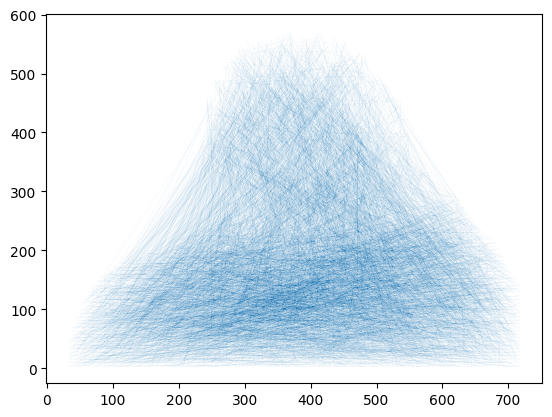

In [291]:
# Plot the coordinates of the black tiles as a scatterplot
random.shuffle(black_tiles)
x, y = zip(*black_tiles)
plt.plot(x, y, linewidth=0.02)
plt.savefig('a.png')

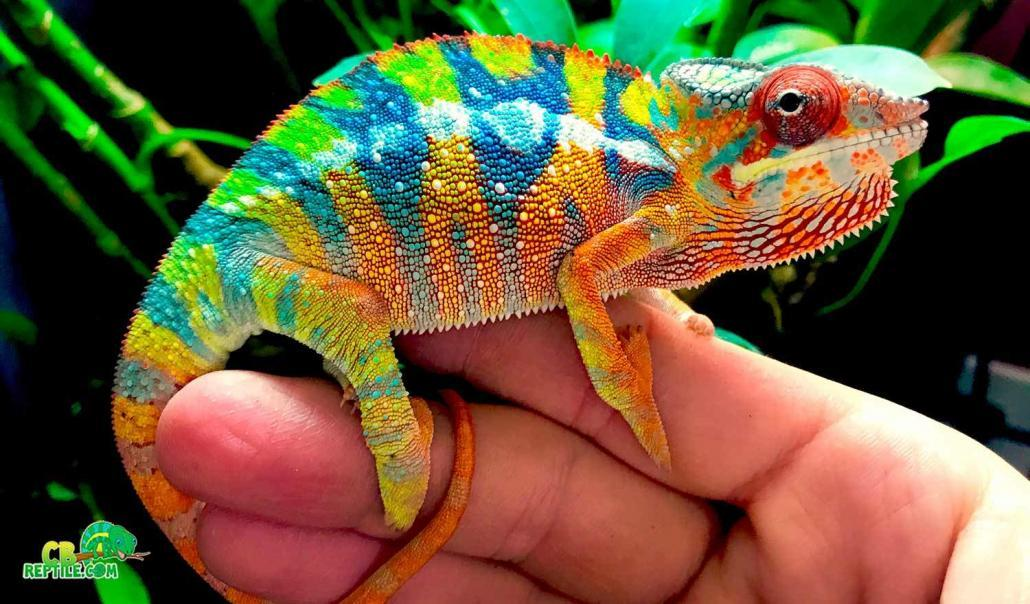

In [326]:
image = Image.open("Data/ambilobe-panther-chameleon-breeder-1030x604.jpg")

image


In [327]:
# Keep the aspect ratio and rotation of the image
image = image.rotate(180, expand=True).convert('RGB')

# Define the grid size and calculate the tile size
grid_size = 130
tile_size = image.width // grid_size

In [328]:
# Process each tile and save the coordinates of the tiles with predominant colors
average_colors  = []
for x in range(grid_size):
    for y in range(grid_size):
        if y * tile_size >= image.height:
            break
        # Crop the tile
        box = (x * tile_size, y * tile_size, (x+1) * tile_size, (y+1) * tile_size)
        tile = image.crop(box)

        # Calculate the average color
        average_color = tuple(np.mean(tile, axis=(0, 1)) / 255.0)

        # Save the center coordinates of the tile with the average color
        center_x = (x * tile_size) + (tile_size // 2)
        center_y = (y * tile_size) + (tile_size // 2)
        average_colors.append((center_x, center_y, average_color))

In [329]:
def color_distance(c1, c2):
    r1, g1, b1 = c1
    r2, g2, b2 = c2
    return ((r1 - r2) ** 2 + (g1 - g2) ** 2 + (b1 - b2) ** 2) ** 0.5


In [330]:
target_color = (255, 255, 255)
average_colors = sorted(average_colors, key=lambda x: color_distance(x[2], target_color))


In [343]:
def remove_borders(axis):
    # remove spines
    axis.spines['right'].set_visible(False)
    axis.spines['top'].set_visible(False)
    axis.spines['bottom'].set_visible(False)
    axis.spines['left'].set_visible(False)

    # remove ticks
    axis.tick_params(axis='both', bottom=False, top=False, left=False, right=False)
    axis.set_xticklabels([])
    axis.set_yticklabels([])

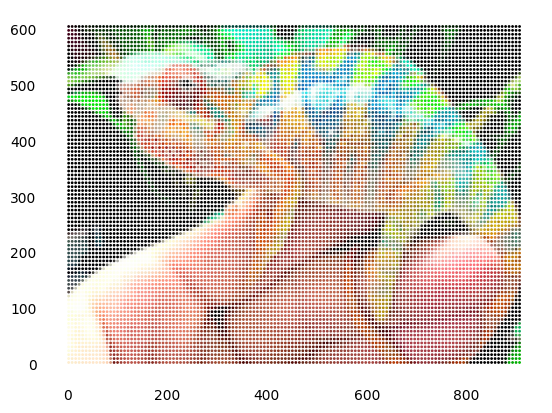

In [331]:
# Plot the scatterplot
fig, ax = plt.subplots()
colors = [color for (x, y, color) in average_colors]
ax.scatter([x for (x, y, color) in average_colors], [y for (x, y, color) in average_colors], c=colors, s=1, cmap="gist_rainbow")


remove_borders(ax)
plt.show()

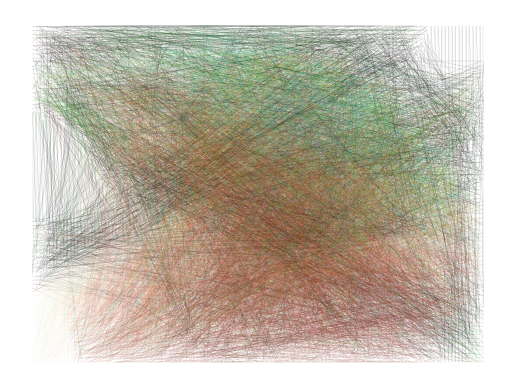

In [344]:
# Mix the indexes
indexes_to_iterate = list(range(len(average_colors) - 1))
random.shuffle(indexes_to_iterate)

# Plot the line plot
fig, ax = plt.subplots()
for i in indexes_to_iterate:
    x1, y1, c1 = average_colors[i]
    x2, y2, c2 = average_colors[i+1]
    ax.plot([x1, x2], [y1, y2], color=c1, linewidth=0.1, alpha=0.5)

remove_borders(ax)
back_color = (29, 32, 41)
back_color_rgba = tuple(c/255 for c in back_color)
fig.savefig('cham.png', dpi=1200, transparent=True, facecolor=back_color_rgba)
plt.show()

In [341]:
back_color = (29, 32, 41)
back_color_rgba = tuple(c/255 for c in back_color)
fig.savefig('cham.png', dpi=1200, transparent=True, facecolor=back_color_rgba)

In [332]:
back_color = (29, 32, 41)